# Homework 3

Columns represent (in order):
1) Diabetes status (1 = has been diagnosed with diabetes, 0 = has not)
2) High blood pressure (1 = has been diagnosed with hypertension, 0 = has not)
3) High cholesterol (1 = has been diagnosed with high cholesterol, 0 = has not)
4) Body Mass Index (weight / height2)
5) Smoker (1 = person has smoked more than 100 cigarettes in their life, 0 = has not)
6) Stroke (1 = person has previously suffered a stroke, 0 = has not)
7) Myocardial issues (1 = has previously had a heart attack, 0 = has not)
8) Physically active (1 = person describes themselves as physically active, 0 = does not)
9) Eats fruit (1 = person reports eating fruit at least once a day, 0 = does not)
10) Eats vegetables (1 = person reports eating vegetables at least once a day, 0 = does not)
11) Heavy Drinker (1 = consumes more drinks than the CDC threshold/week, 0 = does not)
12) Has healthcare (1 = person has some kind of healthcare plan coverage, 0 = does not)
13) NotAbleToAffordDoctor (1 = person needed to see the doctor within the last year, but
could not afford to, 0 = did not)
14) General health: Self-assessment of health status on a scale from 1 to 5
15) Mental health: Days of poor mental health in the last 30 days (self-assessed)
16) Physical health: Days of poor physical health in the last 30 days (self-assessed)
17) Hard to climb stairs (1 = person reports difficulties in climbing stairs, 0 = does not)
18) Biological sex (1 = male, 2 = female)
19) Age bracket (1 = 18-24, 2 = 25-29, 3 = 30-34, 4 = 35-39, 5 = 40-44, 6 = 45-49, 7 = 50-54,
8 = 55-59, 9 = 60-64, 10 = 65-69, 11 = 70-74, 12 = 75-79, 13 = 80+)
20) Education bracket (terminal education is 1 = only kindergarten, 2 = elementary school,
3 = some high school, 4 = GED, 5 = some college, 6 = college graduate)
21) Income bracket (Annual income where 1 = below $10k, 8 = above $75k)
22) Zodiac sign (Tropical calendar, 1 = Aries, 12 = Pisces, with everything else in between)


## Loading the Data and Normalizing it

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import matthews_corrcoef


data = pd.read_csv('diabetes.csv')
data.head()

,Diabetes,HighBP,HighChol,BMI,Smoker,Stroke,Myocardial,PhysActivity,Fruit,Vegetables,...,NotAbleToAffordDoctor,GeneralHealth,MentalHealth,PhysicalHealth,HardToClimbStairs,BiologicalSex,AgeBracket,EducationBracket,IncomeBracket,Zodiac
0,0,1,1,40,1,0,0,0,0,1,...,0,5,18,15,1,1,9,4,3,10
1,0,0,0,25,1,0,0,1,0,0,...,1,3,0,0,0,1,7,6,1,11
2,0,1,1,28,0,0,0,0,1,0,...,1,5,30,30,1,1,9,4,8,2
3,0,1,0,27,0,0,0,1,1,1,...,0,2,0,0,0,1,11,3,6,11
4,0,1,1,24,0,0,0,1,1,1,...,0,2,3,0,0,1,11,5,4,8


### Checking variable distributions

We can see that we have very imbalanced target variables

In [39]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def plot_column_distributions(df):
    """
    Plot the distribution of each column in the given DataFrame in a single figure.
    The orientation of the plot will adapt depending on the number of columns.
    """
    num_columns = len(df.columns)
    grid_size = int(np.ceil(np.sqrt(num_columns)))

    fig, axes = plt.subplots(grid_size, grid_size, figsize=(15, 15))
    fig.tight_layout(pad=5)

    for i, column in enumerate(df.columns):
        row, col = divmod(i, grid_size)
        sns.histplot(data=df, x=column, kde=True, ax=axes[row, col])
        axes[row, col].set_title(column)

    # Remove empty subplots
    for i in range(num_columns, grid_size * grid_size):
        row, col = divmod(i, grid_size)
        fig.delaxes(axes[row, col])

    plt.show()

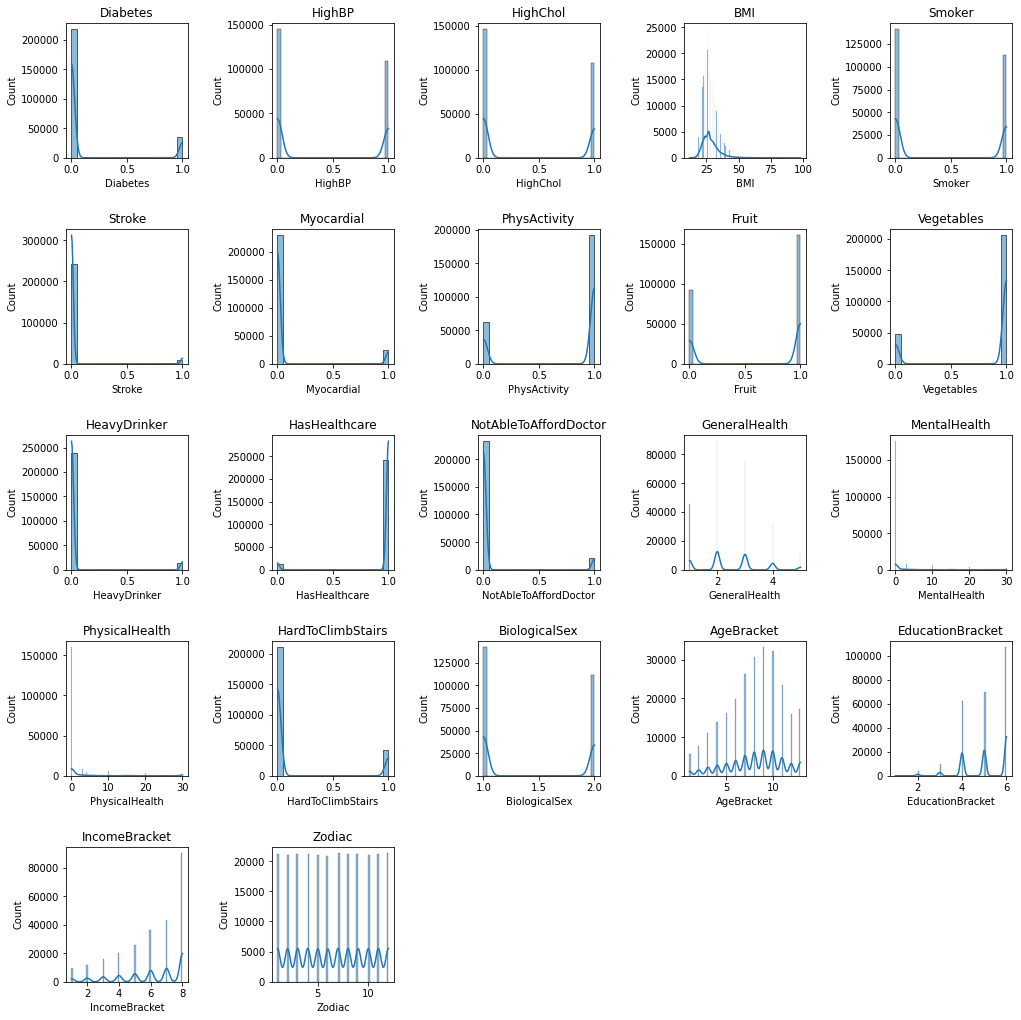

In [40]:
plot_column_distributions(data)

### Normalizing the variables

Why MinMaxScaler? Using MinMaxScaler preserves the original distribution of the data and works well with non-Gaussian distributions, which are present in the dataset. By maintaining the shape of the original distribution, I can ensure that the relationships between features are not distorted during the scaling process. This is particularly important when my data exhibits complex, nonlinear patterns that I want my machine learning model to capture accurately. MinMaxScaler is an ideal choice when dealing with non-Gaussian distributions, as it doesn't rely on the assumptions of normally distributed data like StandardScaler does.

In [3]:
"""For loop to only scale the non-binary variables
"""
for column in data.columns:
    if len(data[column].unique())>2:
        # create an instance of MinMaxScaler
        scaler = MinMaxScaler()
        # fit the scaler to the data and transform the data
        data_scaled = scaler.fit_transform(np.array(data[column]).reshape(-1, 1))
        # print the scaled data
        data[column] = data_scaled

In [5]:
X = data.drop('Diabetes',axis=1)
y = data['Diabetes']
X.head()

,HighBP,HighChol,BMI,Smoker,Stroke,Myocardial,PhysActivity,Fruit,Vegetables,HeavyDrinker,...,NotAbleToAffordDoctor,GeneralHealth,MentalHealth,PhysicalHealth,HardToClimbStairs,BiologicalSex,AgeBracket,EducationBracket,IncomeBracket,Zodiac
0,1,1,0.325581,1,0,0,0,0,1,0,...,0,1.00,0.6,0.5,1,1,0.666667,0.6,0.285714,0.818182
1,0,0,0.151163,1,0,0,1,0,0,0,...,1,0.50,0.0,0.0,0,1,0.500000,1.0,0.000000,0.909091
2,1,1,0.186047,0,0,0,0,1,0,0,...,1,1.00,1.0,1.0,1,1,0.666667,0.6,1.000000,0.090909
3,1,0,0.174419,0,0,0,1,1,1,0,...,0,0.25,0.0,0.0,0,1,0.833333,0.4,0.714286,0.909091
4,1,1,0.139535,0,0,0,1,1,1,0,...,0,0.25,0.1,0.0,0,1,0.833333,0.8,0.428571,0.636364


### The most correlated columns

By plotting the correlation matrix we can see that our variables most correlated with having diabetes are.
- GeneralHealth        0.293569
- HighBP               0.263129
- HardToClimbStairs    0.218344
- BMI                  0.216843
- HighChol             0.200276
- AgeBracket           0.177442
- Myocardial           0.177282
- PhysicalHealth       0.171337

These are the variables we will be focusin the most while running our models.

In [6]:

def plot_correlation_heatmap(corr_matrix):
    plt.figure(figsize=(10, 10))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, square=True, linewidths=0.5)
    plt.title("Correlation Heatmap", fontsize=20)
    plt.show()

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
correlation_matrix = data.corr()


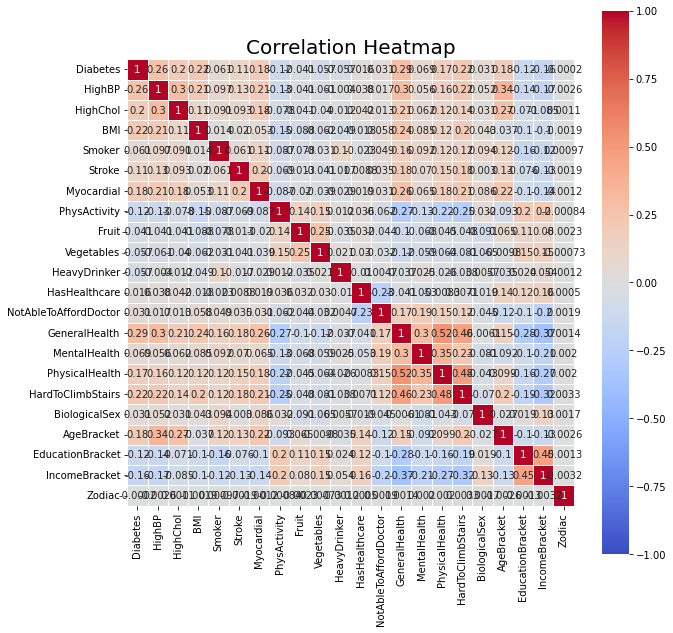

In [8]:
plot_correlation_heatmap(correlation_matrix)

In [9]:
# showing only the high correlated with diabetes 
correlation_matrix[correlation_matrix.Diabetes> .15].Diabetes.sort_values(ascending=False)

Diabetes             1.000000
GeneralHealth        0.293569
HighBP               0.263129
HardToClimbStairs    0.218344
BMI                  0.216843
HighChol             0.200276
AgeBracket           0.177442
Myocardial           0.177282
PhysicalHealth       0.171337
Name: Diabetes, dtype: float64

## Building functions

In [48]:
"""model runner function
# # this functions serves to take any ML model and run it using the same train/test Split
# # For the sake of fairness, I have in my comments the initial version of my functions written by me. 
# # I later dicided to improve the fucntions using GPT-4  
"""
# def model_runner(model,X_train, X_test, y_train, y_test):
#     # fit the model to the training data
#     model.fit(X_train, y_train)

#     # predict the target variable for the testing data
#     y_pred = model.predict(X_test)
#     try: 
#         y_score = model.predict_proba(X_test)[:,1]
#     except AttributeError:
#         y_score = model.decision_function(X_test)
#     # evaluate the accuracy of the model
#     accuracy = accuracy_score(y_test, y_pred)

#     # calculate the false positive rate, true positive rate, and thresholds
#     fpr, tpr, thresholds = roc_curve(y_test, y_score)

#     # calculate the AUC (Area Under the Curve) score
#     roc_auc = auc(fpr, tpr)
    
#     return accuracy,roc_auc,fpr, tpr, thresholds

# def model_comparator(model,X,y):
    
#     significant_drop = {}
    
#     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#     full_model_acc,roc_auc,fpr, tpr, thresholds = model_runner(model,X_train, X_test, y_train, y_test)
#     print('full model:',full_model_acc)
#     for column in X.columns: 
#         X_train, X_test, y_train, y_test = train_test_split(X.drop(column,axis=1), y, test_size=0.2, random_state=42)
#         partial_model_acc,roc_auc,fpr, tpr, thresholds = model_runner(model,X_train, X_test, y_train, y_test)
#         significant_drop[column] = full_model_acc - partial_model_acc
#         print(column+': '+str(partial_model_acc))
            
#     return significant_drop
            
 
def fit_model(model, X_train, y_train):
    """Fit the model to the training data."""
    model.fit(X_train, y_train)
    return model

def evaluate_model(model, X_test, y_test):
    """Evaluate the model's performance and return relevant metrics."""
    y_pred = model.predict(X_test)

    try:
        y_score = model.predict_proba(X_test)[:, 1]
    except AttributeError:
        y_score = model.decision_function(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    fpr, tpr, thresholds = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)
    mcc = matthews_corrcoef(y_test, y_pred)

    return accuracy, roc_auc, fpr, tpr, thresholds,mcc


def evaluate_feature_importance(model, X, y):
    """Evaluate the importance of each feature by measuring the drop in ROC-AUC when it is removed."""
    significant_drop = {}
    roc_curve_data = {}  # Store ROC curve data for each model

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model = fit_model(model, X_train, y_train)
    full_model_acc, full_model_roc_auc, fpr, tpr, thresholds,mcc = evaluate_model(model, X_test, y_test)
    roc_curve_data['Full Model'] = (fpr, tpr, full_model_roc_auc)
    print('Full model ROC-AUC:', full_model_roc_auc)
    print("Full model mcc",mcc)

    for column in X.columns:
        X_temp = X.drop(column, axis=1)
        X_train_temp, X_test_temp, y_train_temp, y_test_temp = train_test_split(X_temp, y, test_size=0.2, random_state=42)
        model = fit_model(model, X_train_temp, y_train_temp)
        partial_model_acc, partial_model_roc_auc, fpr, tpr, thresholds,mcc = evaluate_model(model, X_test_temp, y_test_temp)
        significant_drop[column] = full_model_roc_auc - partial_model_roc_auc
        roc_curve_data[f"Without {column}"] = (fpr, tpr, partial_model_roc_auc)
        print(f"{column}: {partial_model_roc_auc}")

    return significant_drop, roc_curve_data
    

In [11]:
def plot_roc_curves(roc_curve_data):
    """Plot ROC curves for each model in the given dictionary of ROC curve data."""
    # Sort the models by AUC value, except the full model
    sorted_roc_curve_data = {k: v for k, v in sorted(roc_curve_data.items(), key=lambda item: item[1][2])}
    full_model_data = sorted_roc_curve_data.pop('Full Model')
    sorted_roc_curve_data = {'Full Model': full_model_data, **sorted_roc_curve_data}

    num_models = len(sorted_roc_curve_data)
    grid_size = int(np.ceil(np.sqrt(num_models)))

    fig, axes = plt.subplots(grid_size, grid_size, figsize=(15, 15))
    fig.tight_layout(pad=5)

    for i, (model_name, (fpr, tpr, roc_auc)) in enumerate(sorted_roc_curve_data.items()):
        row, col = divmod(i, grid_size)
        axes[row, col].plot(fpr, tpr, label=f"(AUC = {roc_auc:.4f})")
        axes[row, col].plot([0, 1], [0, 1], linestyle='--', color='gray')
        axes[row, col].set_xlim([0, 1])
        axes[row, col].set_ylim([0, 1])
        axes[row, col].set_xlabel('False Positive Rate')
        axes[row, col].set_ylabel('True Positive Rate')
        axes[row, col].set_title(f"{model_name}")
        axes[row, col].legend(fontsize='small')

    # Remove empty subplots
    for i in range(num_models, grid_size * grid_size):
        row, col = divmod(i, grid_size)
        fig.delaxes(axes[row, col])

    plt.show()

### Why are we using the ROC_AUC curve to compare feature importance
When evaluating the importance of features in a machine learning model, it's often better to use ROC-AUC curve analysis than accuracy, particularly for datasets where class imbalance is present. This is because the ROC-AUC curve considers both the sensitivity (true positive rate) and 1-specificity (false positive rate) across different classification thresholds, while accuracy only looks at a single metric that may not be able to accurately measure the model's performance when the distribution of classes is uneven.

## Evaluation methodology
I consistently applied the same evaluation methodology across all models. The process began by measuring the AUC score of the "Full model," which includes all the original columns of the dataset. Next, I iteratively fitted the models and evaluated them, dropping one column at each step and retaining the other columns in the dataset. This was done for every column.

The underlying rationale for this approach is to identify any substantial decrease in the AUC score. I hypothesize that a steeper drop indicates that the removed column contributes significantly to the variance in the predictions. To measure this, I calculated the difference between the AUC of the "Full model" and the AUC of the current model at each iteration. A larger difference signifies a steeper drop, suggesting that the dropped variable has greater importance.


## 1. Build a logistic regression model. Doing so: What is the best predictor of diabetes and what is the AUC of this model?

### Comparing the logistical regression models 

As a result of the model comparisons, I got General Health as the best predictor. I used the methodology I explained previously. On that process we found that the model had a drop of almost 2%. Which can be interpreted as somewhat significant, because of how many other variables that are in that model(21 variables/columns).

This result aligns with our initial correlation of the features and the target variable. General Health was at the top as one of the most correlated variables to our taget variable.


In [50]:


# create an instance of Logistic Regression classifier
model = LogisticRegression(class_weight="balanced")

best_predictors,roc_auc_data = evaluate_feature_importance(model,X,y)



Full model ROC-AUC: 0.8254378520595667
Full model mcc 0.3621454168898367
HighBP: 0.817481711312602
HighChol: 0.818785410748963
BMI: 0.8108940928500603
Smoker: 0.8254427876601412
Stroke: 0.8253581881007406
Myocardial: 0.824968654688566
PhysActivity: 0.8254269238132101
Fruit: 0.825402314428419
Vegetables: 0.825452176900956
HeavyDrinker: 0.8237412928678435
HasHealthcare: 0.8253227141863828
NotAbleToAffordDoctor: 0.825442338375084
GeneralHealth: 0.8098388251776719
MentalHealth: 0.825352830989094
PhysicalHealth: 0.8253480162870441
HardToClimbStairs: 0.8254410297302445
BiologicalSex: 0.824455817851512
AgeBracket: 0.8182142387400743
EducationBracket: 0.825279453753542
IncomeBracket: 0.8248213806805589
Zodiac: 0.8254551307459871


In [56]:
print(sorted(best_predictors.items(), key=lambda x: x[1],reverse=True)[:6])


[('GeneralHealth', 0.01559902688189474), ('BMI', 0.014543759209506346), ('HighBP', 0.007956140746964602), ('AgeBracket', 0.007223613319492395), ('HighChol', 0.006652441310603607), ('HeavyDrinker', 0.0016965591917231793)]


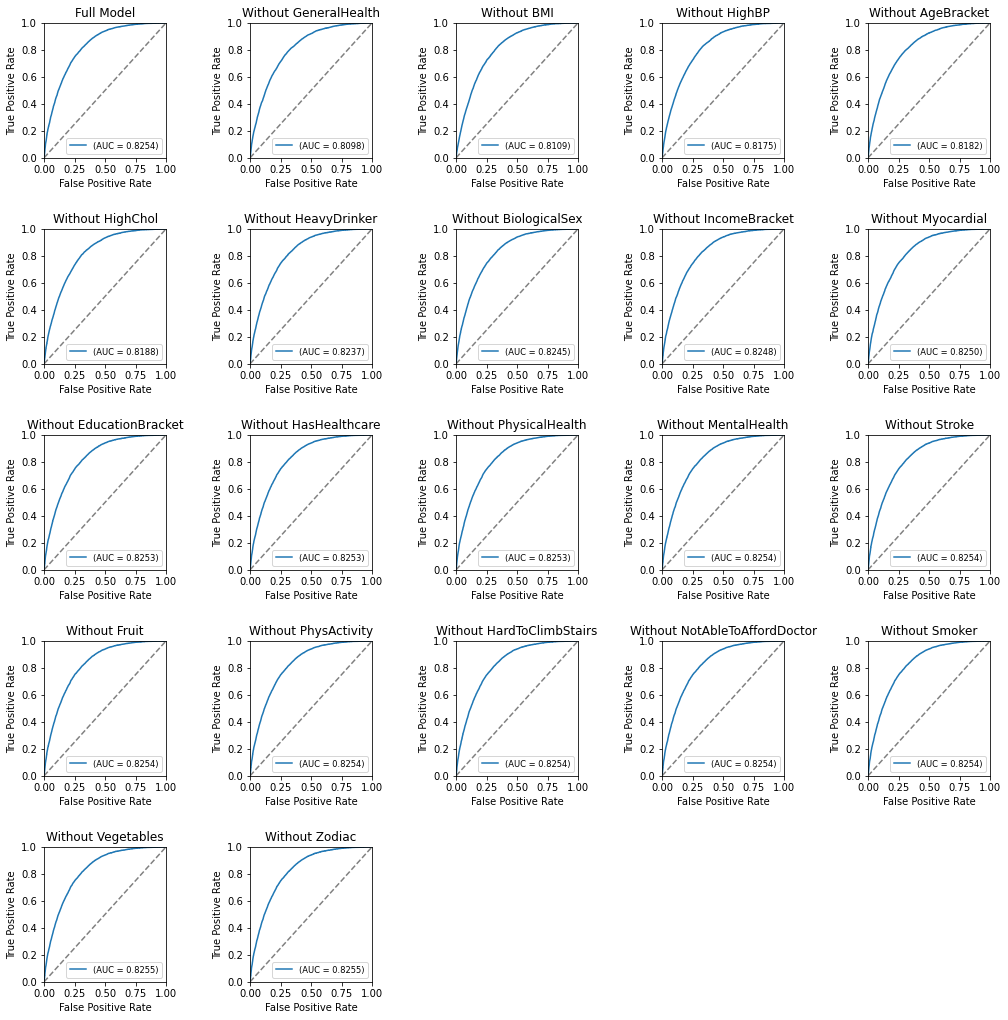

In [57]:
plot_roc_curves(roc_auc_data)

### Correlation of the top 3 predictors


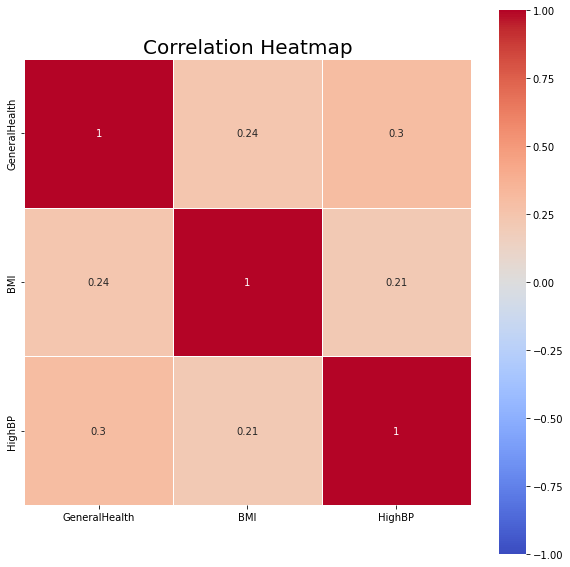

In [67]:
correlation_matrix = data[['GeneralHealth','BMI','HighBP']].corr()
plot_correlation_heatmap(correlation_matrix)

### Model with the best predictor with Logistical regression

Our best predictor gives an AUC of about 0.74 on a Logistical regression model.

In [60]:
model = LogisticRegression(class_weight="balanced")
X_train, X_test, y_train, y_test = train_test_split(np.array(X['GeneralHealth']).reshape(-1,1), y, test_size=0.2, random_state=42)
model = fit_model(model, X_train, y_train)
full_model_acc, full_model_roc_auc, fpr, tpr, thresholds,mcc = evaluate_model(model, X_test, y_test)
print('mcc',mcc)

mcc 0.2597389978669571


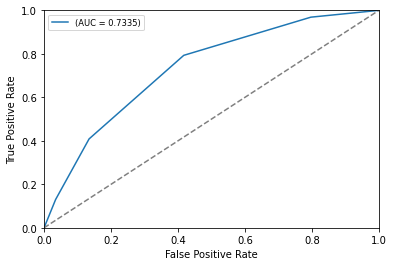

In [61]:
fig, ax = plt.subplots()

ax.plot(fpr, tpr, label=f"(AUC = {full_model_roc_auc:.4f})")
ax.plot([0, 1], [0, 1], linestyle='--', color='gray')
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title(f"")
ax.legend(fontsize='small')

## 2. Build a SVM. Doing so: What is the best predictor of diabetes and what is the AUC of this model?


### Comparing the SVM models

Also, as a result of the model comparisons, I got General Health as the best predictor for the SVM models. I used the methodology I explained previously. On that process we found that the model had a drop of almost 2%. Which can be interpreted as somewhat significant, because of how many other variables that are in that model(21 variables/columns).

This result aligns with our initial correlation of the features and the target variable. General Health was at the top as one of the most correlated variables to our target variables.

I wont be plotting the correlation between the top 3 models, because they are the same as in the previous logistical regression models.

In [49]:
from sklearn.svm import LinearSVC

model_svm = LinearSVC(C=1, dual=False, random_state=42,class_weight="balanced")


best_predictors,roc_auc_data = evaluate_feature_importance(model_svm,X,y)


Full model ROC-AUC: 0.8252095074220633
Full model mcc 0.36056690072028674
HighBP: 0.8173162404428941
HighChol: 0.8184442645205737
BMI: 0.8107501909306286
Smoker: 0.825209636489407
Stroke: 0.8251220471421709
Myocardial: 0.8247308048130148
PhysActivity: 0.8251910377218001
Fruit: 0.8251744533850138
Vegetables: 0.8252209143612262
HeavyDrinker: 0.823485017403653
HasHealthcare: 0.8250871973256018
NotAbleToAffordDoctor: 0.825210363514318
GeneralHealth: 0.8093698140557493
MentalHealth: 0.8251219213423548
PhysicalHealth: 0.8251186881237064
HardToClimbStairs: 0.825227908504245
BiologicalSex: 0.8242187881254109
AgeBracket: 0.8179046241538855
EducationBracket: 0.8250499393411258
IncomeBracket: 0.8245861676998529
Zodiac: 0.8252204765125158


In [70]:
print(sorted(best_predictors.items(), key=lambda x: x[1],reverse=True))

[('GeneralHealth', 0.015839693366314078), ('BMI', 0.014459316491434726), ('HighBP', 0.007893266979169256), ('AgeBracket', 0.0073048832681777975), ('HighChol', 0.00676524290148961), ('HeavyDrinker', 0.0017244900184103518), ('BiologicalSex', 0.000990719296652398), ('IncomeBracket', 0.0006233397222104031), ('Myocardial', 0.00047870260904858686), ('EducationBracket', 0.00015956808093753327), ('HasHealthcare', 0.0001223100964615753), ('PhysicalHealth', 9.081929835697e-05), ('MentalHealth', 8.758607970849042e-05), ('Stroke', 8.746027989248173e-05), ('Fruit', 3.5054037049508935e-05), ('PhysActivity', 1.8469700263201716e-05), ('Smoker', -1.2906734370154993e-07), ('NotAbleToAffordDoctor', -8.560922546418936e-07), ('Zodiac', -1.0969090452506158e-05), ('Vegetables', -1.1406939162905694e-05), ('HardToClimbStairs', -1.8401082181651596e-05)]


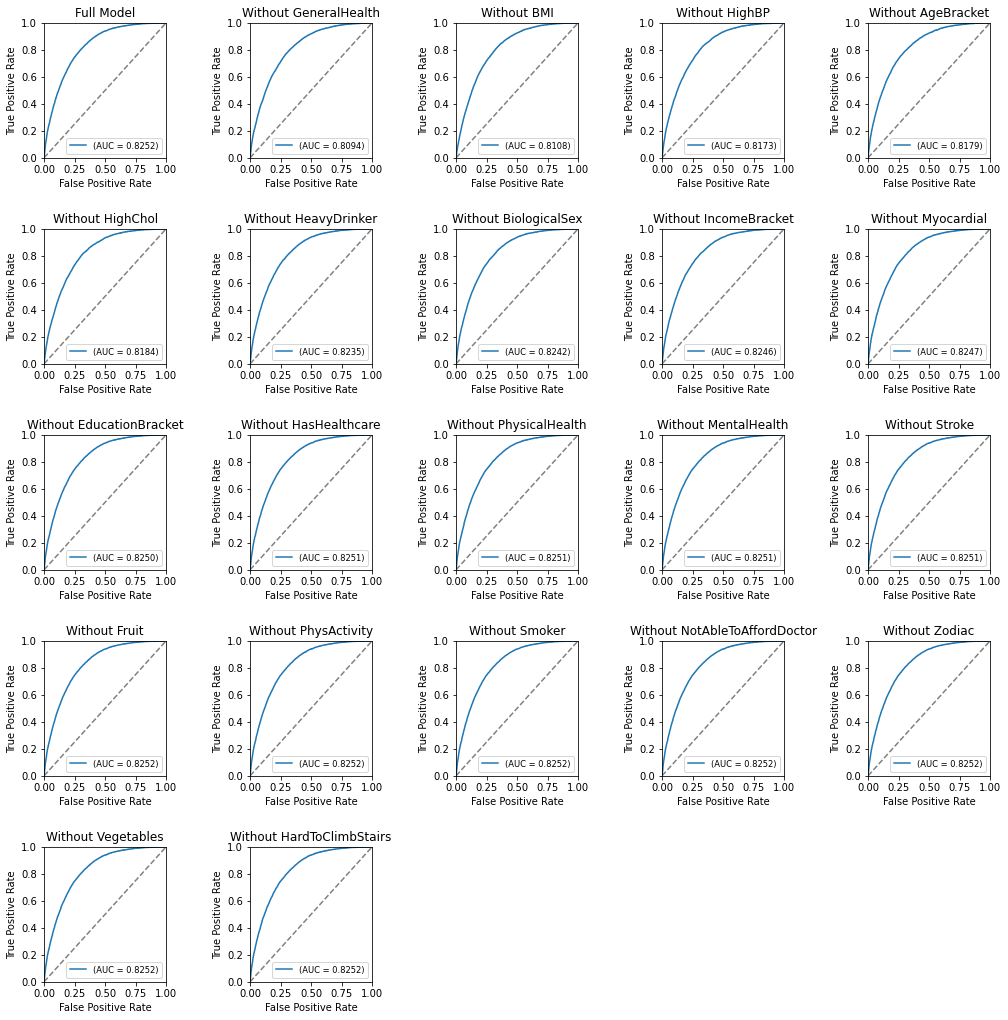

In [71]:
plot_roc_curves(roc_auc_data)

### Model with the best predictor for SVM 
Our best predictor gives an AUC of about 0.74 on a SVM model.

In [58]:
model_svm = LinearSVC(C=1, dual=False, random_state=42,class_weight="balanced")

X_train, X_test, y_train, y_test = train_test_split(np.array(X['GeneralHealth']).reshape(-1,1), y, test_size=0.2, random_state=42)
model_svm = fit_model(model_svm, X_train, y_train)
full_model_acc, full_model_roc_auc, fpr, tpr, thresholds,mcc = evaluate_model(model_svm, X_test, y_test)
print("mcc",mcc)

mcc 0.2597389978669571


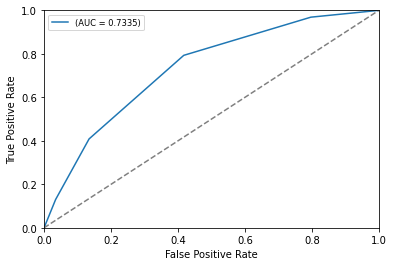

In [59]:
fig, ax = plt.subplots()

ax.plot(fpr, tpr, label=f"(AUC = {full_model_roc_auc:.4f})")
ax.plot([0, 1], [0, 1], linestyle='--', color='gray')
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title(f"")
ax.legend(fontsize='small')

## 3. Use a single, individual decision tree. Doing so: What is the best predictor of diabetes and what is the AUC of this model?


### Comparing Decision Tree Models

As a result of the model comparisons, I got BMI as the best predictor for the Decision tree models. I used the methodology I explained previously. On that process we found that the model had a drop of 1%. Which can be interpreted as somewhat significant, because of how many other variables that are in that model(21 variables/columns).

This result aligns with our initial correlation of the features and the target variable. BMI was at the top as one of the most correlated variables to our target variable.

In [74]:
from sklearn.tree import DecisionTreeClassifier

model_decision = DecisionTreeClassifier(max_depth=None, min_samples_split=2, random_state=42,class_weight="balanced")

best_predictors,roc_auc_data = evaluate_feature_importance(model_decision,X,y)


Full model ROC-AUC: 0.5907573917774489
HighBP: 0.5806731298516843
HighChol: 0.5837018992926204
BMI: 0.5801492520385688
Smoker: 0.5899595056273738
Stroke: 0.5908069454686191
Myocardial: 0.5906262511874073
PhysActivity: 0.5881313124489279
Fruit: 0.5930080468783571
Vegetables: 0.5908513446348599
HeavyDrinker: 0.5868726477129432
HasHealthcare: 0.5914662328967022
NotAbleToAffordDoctor: 0.5916476002886181
GeneralHealth: 0.5810031452470005
MentalHealth: 0.592232709936865
PhysicalHealth: 0.5920434122552476
HardToClimbStairs: 0.5908567768996432
BiologicalSex: 0.5948071427227308
AgeBracket: 0.5811262493526905
EducationBracket: 0.5870979241419463
IncomeBracket: 0.588308600332524
Zodiac: 0.5904858340862562


In [75]:
print(sorted(best_predictors.items(), key=lambda x: x[1],reverse=True))

[('BMI', 0.010608139738880085), ('HighBP', 0.010084261925764615), ('GeneralHealth', 0.00975424653044843), ('AgeBracket', 0.009631142424758377), ('HighChol', 0.007055492484828507), ('HeavyDrinker', 0.003884744064505674), ('EducationBracket', 0.0036594676355026223), ('PhysActivity', 0.0026260793285209916), ('IncomeBracket', 0.002448791444924936), ('Smoker', 0.0007978861500751444), ('Zodiac', 0.000271557691192692), ('Myocardial', 0.00013114059004160072), ('Stroke', -4.955369117021213e-05), ('Vegetables', -9.39528574109838e-05), ('HardToClimbStairs', -9.938512219431761e-05), ('HasHealthcare', -0.0007088411192532895), ('NotAbleToAffordDoctor', -0.000890208511169166), ('PhysicalHealth', -0.0012860204777986883), ('MentalHealth', -0.0014753181594161502), ('Fruit', -0.002250655100908161), ('BiologicalSex', -0.004049750945281927)]


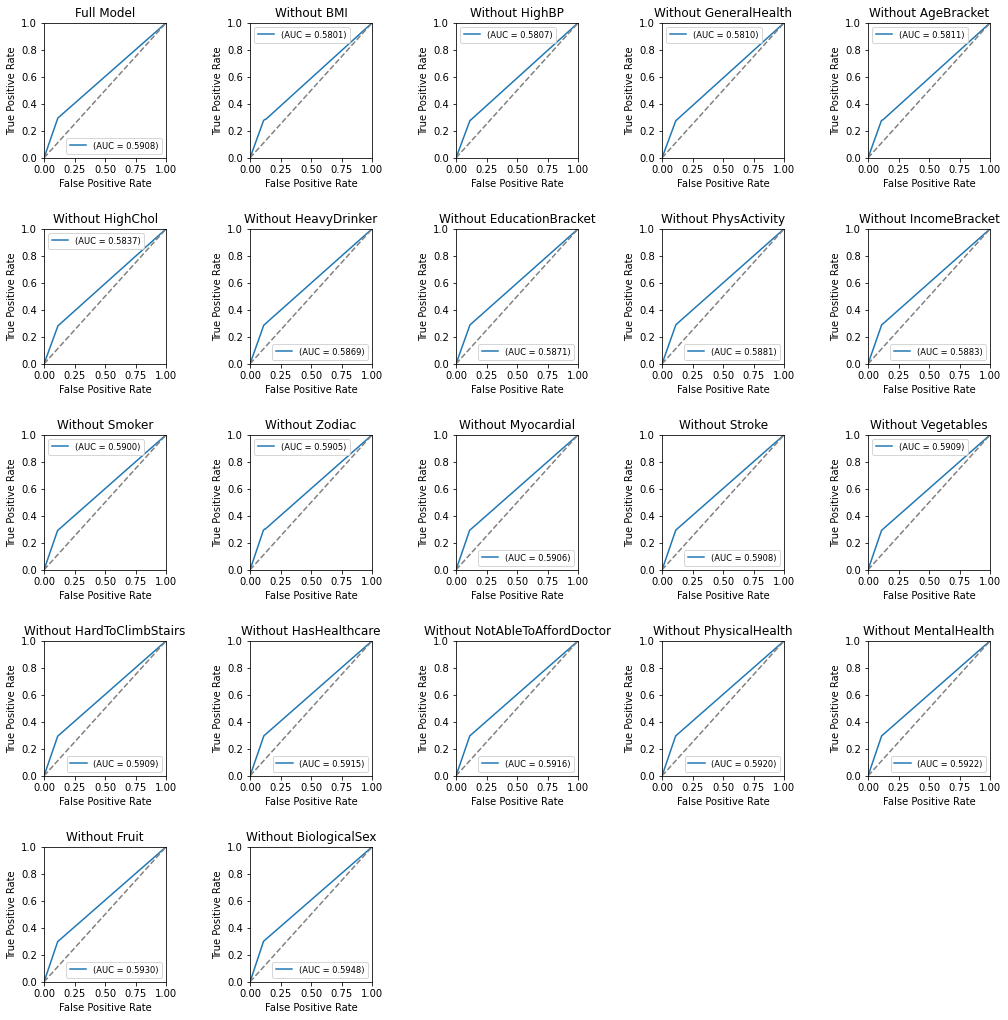

In [76]:
plot_roc_curves(roc_auc_data)

### Model with the best predictor for Decision Tree 
Our best predictor BMI, gave us an AUC of 0.69, which is surprisingly better than our original "Full model", which may indicate that on the "Full model", variables that haven an inverse correlation with our target variable are some how, causing some diminishing returns to our model.

In [51]:
model_decision = DecisionTreeClassifier(max_depth=None, min_samples_split=2, random_state=42,class_weight="balanced")

X_train, X_test, y_train, y_test = train_test_split(np.array(X['BMI']).reshape(-1,1), y, test_size=0.2, random_state=42)
model_decision = fit_model(model_decision, X_train, y_train)
full_model_acc, full_model_roc_auc, fpr, tpr, thresholds,mcc = evaluate_model(model_decision, X_test, y_test)

NameError: name 'DecisionTreeClassifier' is not defined

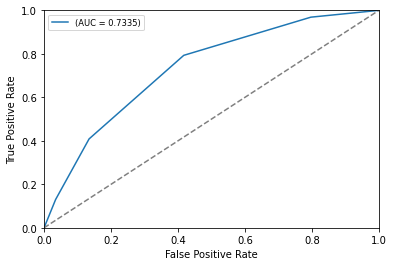

In [52]:
fig, ax = plt.subplots()

ax.plot(fpr, tpr, label=f"(AUC = {full_model_roc_auc:.4f})")
ax.plot([0, 1], [0, 1], linestyle='--', color='gray')
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title(f"")
ax.legend(fontsize='small')

## 4. Build a random forest model. Doing so: What is the best predictor of diabetes and what is the AUC of this model?


### Comparing Random Forest Models

As a result of the model comparisons, I got BMI as the best predictor for the Random Forest models. I used the methodology I explained previously. On that process we found that the model had a drop of almost 3%. Which can be interpreted as somewhat significant, because of how many other variables that are in that model(21 variables/columns).

This result aligns with our initial correlation of the features and the target variable. BMI was at the top as one of the most correlated variables to our target variable.

In [12]:
from sklearn.ensemble import RandomForestClassifier
model_random_forest = RandomForestClassifier(n_estimators=50, max_depth=None, random_state=42,class_weight="balanced")

best_predictors,roc_auc_data = evaluate_feature_importance(model_random_forest,X,y)



Full model ROC-AUC: 0.802839506395112
HighBP: 0.7929529870762778
HighChol: 0.7975243759444443
BMI: 0.7709518392787563
Smoker: 0.8001419449970986
Stroke: 0.8031455953189243
Myocardial: 0.8037789679849042
PhysActivity: 0.8025228323153508
Fruit: 0.8003409766437023
Vegetables: 0.8028286516681287
HeavyDrinker: 0.8021260842020385
HasHealthcare: 0.8035467905374214
NotAbleToAffordDoctor: 0.8041441811884882
GeneralHealth: 0.779888535677496
MentalHealth: 0.8031781398947084
PhysicalHealth: 0.8017488448627944
HardToClimbStairs: 0.8025968107759978
BiologicalSex: 0.8004177227003019
AgeBracket: 0.7828175605681921
EducationBracket: 0.8024166899458953
IncomeBracket: 0.7976403454034247
Zodiac: 0.7924595724238085


In [15]:
print(sorted(best_predictors.items(), key=lambda x: x[1],reverse=True))

[('BMI', 0.03188766711635571), ('GeneralHealth', 0.02295097071761598), ('AgeBracket', 0.020021945826919962), ('Zodiac', 0.010379933971303545), ('HighBP', 0.00988651931883422), ('HighChol', 0.005315130450667782), ('IncomeBracket', 0.005199160991687379), ('Smoker', 0.0026975613980134705), ('Fruit', 0.0024985297514097393), ('BiologicalSex', 0.0024217836948101645), ('PhysicalHealth', 0.0010906615323176272), ('HeavyDrinker', 0.0007134221930735762), ('EducationBracket', 0.0004228164492167119), ('PhysActivity', 0.0003166740797612144), ('HardToClimbStairs', 0.00024269561911427484), ('Vegetables', 1.085472698336698e-05), ('Stroke', -0.0003060889238122311), ('MentalHealth', -0.0003386334995963969), ('HasHealthcare', -0.0007072841423093612), ('Myocardial', -0.0009394615897921899), ('NotAbleToAffordDoctor', -0.0013046747933761482)]


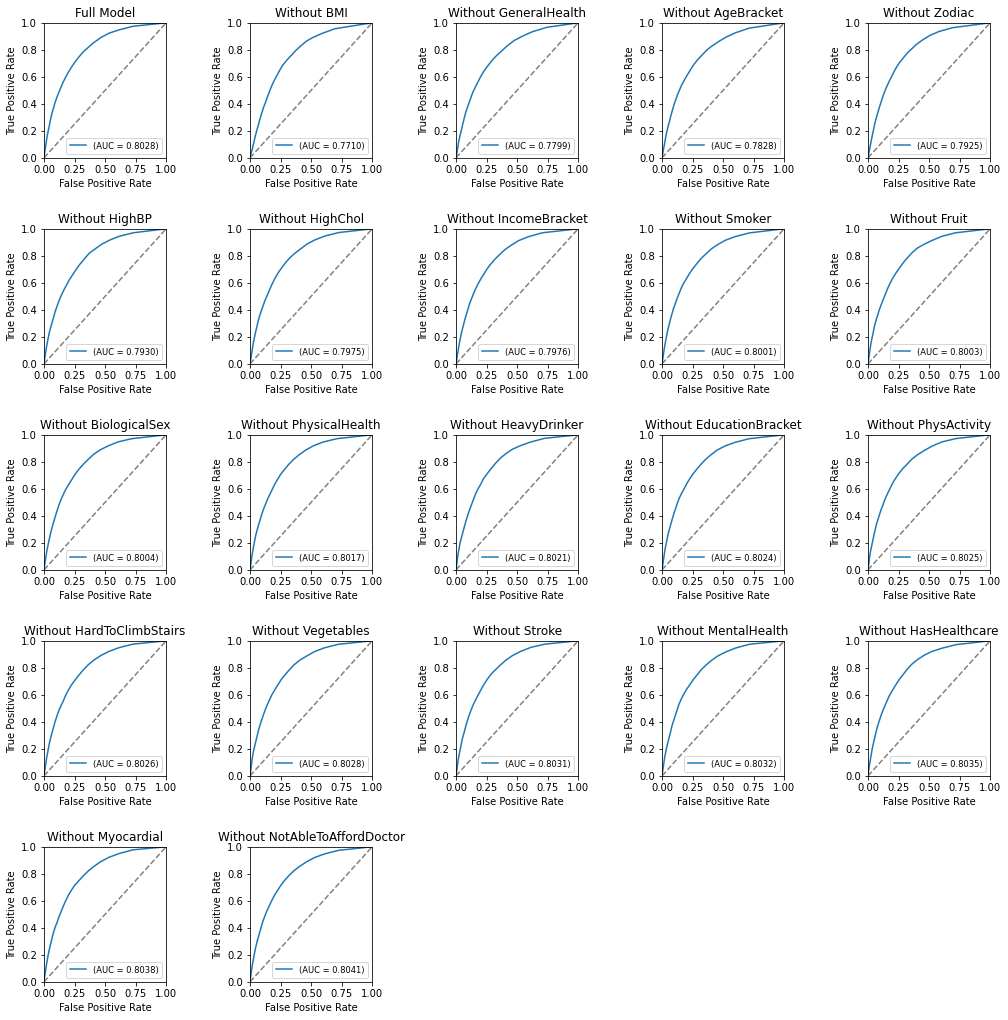

In [16]:
plot_roc_curves(roc_auc_data)

### Model with the best predictor for Random Forest

Our best predictor gives an AUC of about 0.69 on a Random Forest model.

In [53]:
model_random_forest = RandomForestClassifier(n_estimators=100, max_depth=None, random_state=42,class_weight="balanced")

X_train, X_test, y_train, y_test = train_test_split(np.array(X['BMI']).reshape(-1,1), y, test_size=0.2, random_state=42)
model_random_forest = fit_model(model_random_forest, X_train, y_train)
full_model_acc, full_model_roc_auc, fpr, tpr, thresholds,mcc = evaluate_model(model_random_forest, X_test, y_test)
print(mcc)

0.1984252355444787


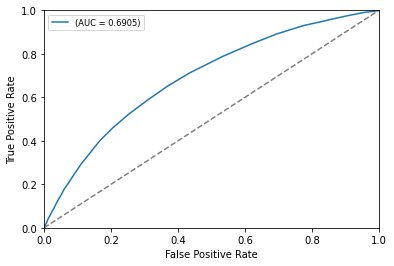

In [54]:
fig, ax = plt.subplots()

ax.plot(fpr, tpr, label=f"(AUC = {full_model_roc_auc:.4f})")
ax.plot([0, 1], [0, 1], linestyle='--', color='gray')
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title(f"")
ax.legend(fontsize='small')

## 5. Build a model using adaBoost. Doing so: What is the best predictor of diabetes and what is the AUC of this model?

### Comparing AdaBoost Models 

As a result of the model comparisons, I got BMI as the best predictor for the AdaBoost models. I used the methodology I explained previously. On that process we found that the model had a drop of almost 2%. Which can be interpreted as somewhat significant, because of how many other variables that are in that model(21 variables/columns).

This result aligns with our initial correlation of the features and the target variable. BMI was at the top as one of the most correlated variables to our target variable.

In [55]:
from sklearn.ensemble import AdaBoostClassifier

ada_model = AdaBoostClassifier(n_estimators=70, learning_rate=0.9, random_state=42)

best_predictors,roc_auc_data = evaluate_feature_importance(ada_model,X,y)


Full model ROC-AUC: 0.8301525073130291
Full model mcc 0.2705081962826419
HighBP: 0.8226315947192087
HighChol: 0.8245842104507671
BMI: 0.814135612652603
Smoker: 0.8301525073130291
Stroke: 0.8300521386650005
Myocardial: 0.8296723784281442
PhysActivity: 0.8301552079246644
Fruit: 0.8301525073130291
Vegetables: 0.8301639338573582
HeavyDrinker: 0.8284285744080899
HasHealthcare: 0.8300966276882527
NotAbleToAffordDoctor: 0.8301525073130291
GeneralHealth: 0.8145903871563838
MentalHealth: 0.8300494298845462
PhysicalHealth: 0.8301232792778495
HardToClimbStairs: 0.8301720095520421
BiologicalSex: 0.829511156978196
AgeBracket: 0.8218750248229995
EducationBracket: 0.830008747531052
IncomeBracket: 0.8293572678603822
Zodiac: 0.8301525073130291


In [34]:
print(sorted(best_predictors.items(), key=lambda x: x[1],reverse=True))

[('BMI', 0.016016894660426106), ('GeneralHealth', 0.015562120156645376), ('AgeBracket', 0.008277482490029686), ('HighBP', 0.0075209125938204835), ('HighChol', 0.005568296862262012), ('HeavyDrinker', 0.0017239329049392182), ('IncomeBracket', 0.0007952394526469231), ('BiologicalSex', 0.0006413503348331462), ('Myocardial', 0.0004801288848849117), ('EducationBracket', 0.00014375978197711525), ('MentalHealth', 0.00010307742848292278), ('Stroke', 0.00010036864802864809), ('HasHealthcare', 5.587962477648922e-05), ('PhysicalHealth', 2.9228035179684753e-05), ('Smoker', 0.0), ('Fruit', 0.0), ('NotAbleToAffordDoctor', 0.0), ('Zodiac', 0.0), ('PhysActivity', -2.7006116352090714e-06), ('Vegetables', -1.1426544329062871e-05), ('HardToClimbStairs', -1.9502239012925138e-05)]


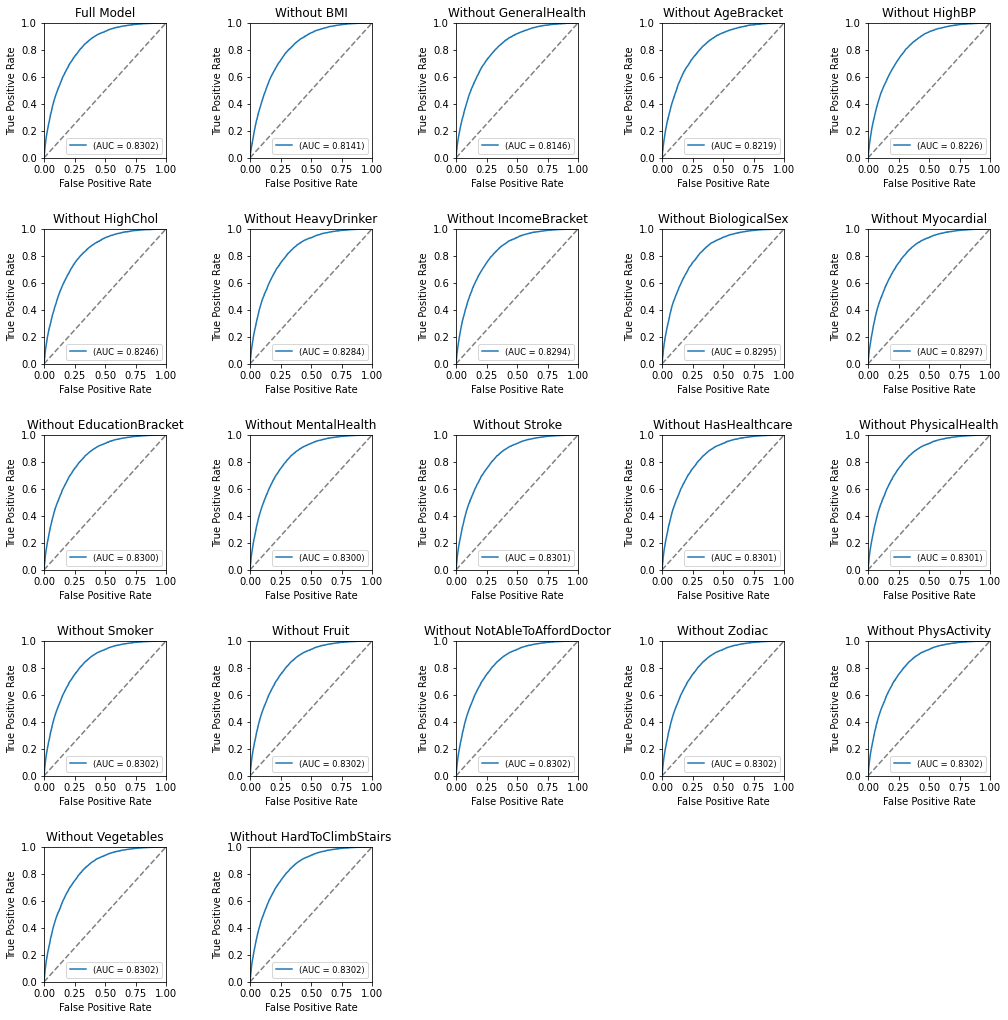

In [35]:
plot_roc_curves(roc_auc_data)

### Model with the best predictor for Adaboost



In [56]:
ada_model = AdaBoostClassifier(n_estimators=70, learning_rate=0.9, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(np.array(X['BMI']).reshape(-1,1), y, test_size=0.2, random_state=42)
model_random_forest = fit_model(model_random_forest, X_train, y_train)
full_model_acc, full_model_roc_auc, fpr, tpr, thresholds,mcc = evaluate_model(model_random_forest, X_test, y_test)
print(mcc)

0.1984252355444787


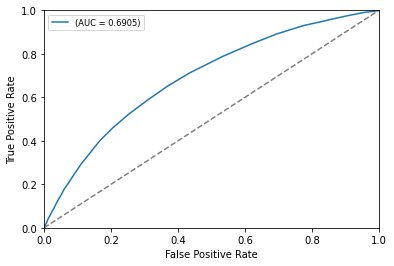

In [57]:
fig, ax = plt.subplots()

ax.plot(fpr, tpr, label=f"(AUC = {full_model_roc_auc:.4f})")
ax.plot([0, 1], [0, 1], linestyle='--', color='gray')
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title(f"")
ax.legend(fontsize='small')


## Extra credit:

a) Which of these 5 models is the best to predict diabetes in this dataset?

b) Tell us something interesting about this dataset that is not already covered by the
questions above and that is not obvious.

### Extra Credit A

Looking by the AUC curve alone, Logistical regression, SVM and Adaboost achieves the best results. So to find a tiebreaker, I decided to go back and calculate their respective MCC: 

For the full models I got the following results: 

Logistic Regression: 0.3621454168898367

SVM: 0.36056690072028674

AdaBoost: 0.2705081962826419

While for the best predictor model I got the following results:

Logistic Regression: 0.2597389978669571

SVM: 0.2597389978669571

AdaBoost: 0.1984252355444787

The higher the MCC value, the better the model's performance. In this case, the Logistic Regression model has the highest MCC value, so I would choose it as the best prediction model among the three.

### Extra Credit B
There is an inverse correlation between 'IncomeBracket' and 'GeneralHealth' with a correlation coefficient of -0.370014. 
As the 'IncomeBracket' increases, the 'GeneralHealth' tends to decrease, and vice versa. This may suggest that individuals with higher income brackets tend to have a lower general health score, which could be associated with a higher risk of developing diabetes. 

One possible explanation could be related to lifestyle choices, for example, individuals with higher incomes may have more sedentary jobs, leading to a less active lifestyle, which could contribute to a higher risk of developing diabetes.


In [17]:
data[['IncomeBracket',"GeneralHealth"]].corr()

,IncomeBracket,GeneralHealth
IncomeBracket,1.000000,-0.370014
GeneralHealth,-0.370014,1.000000


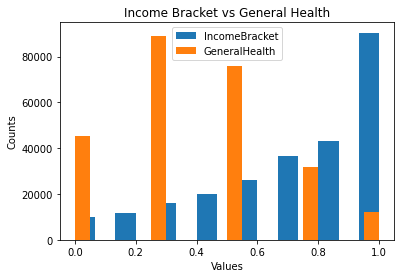

In [16]:
plt.hist(data['IncomeBracket'],bins=15,label='IncomeBracket')
plt.title('Income Bracket vs General Health')
plt.hist(data['GeneralHealth'],bins=20,label='GeneralHealth')
plt.ylabel('Counts')
plt.xlabel('Values')
plt.legend()
plt.show()